In [1]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow.keras.utils import *
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import *

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(tf.config.list_physical_devices('GPU'))

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]
Pandas 1.0.3
Scikit-Learn 0.22.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', 'r')
    train_x_orig = np.array(train_dataset['train_set_x'][:])
    train_y_orig = np.array(train_dataset['train_set_y'][:])
    
    test_dataset = h5py.File('datasets/test_happy.h5', 'r')
    test_x_orig = np.array(test_dataset['test_set_x'][:])
    test_y_orig = np.array(test_dataset['test_set_y'][:])
    
    classes = np.array(test_dataset['list_classes'][:])
    
    test_y_orig = test_y_orig.reshape(1, test_y_orig.shape[0])
    train_y_orig = train_y_orig.reshape(1, train_y_orig.shape[0])
    
    return train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes

    

In [14]:
def normalize():
    train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes = load_dataset()
    train_x = train_x_orig/255
    train_y = train_y_orig.T
    
    test_x = test_x_orig/255
    test_y = test_y_orig.T
    
    print('Number of training Examples: ' + str(train_x.shape[0]))
    print('Number of test Examples: ' + str(test_x.shape[0]))
    print('Train-X shape: ' + str(train_x.shape))
    print('Train_Y shape: ' + str(train_y.shape))
    print ("Test_X shape: " + str(test_x.shape))
    print ("Train_Y shape: " + str(test_y.shape))
    
    index = 40
    plt.imshow(train_x_orig[index])
    print('y =' + str(np.squeeze(train_y_orig[:,index])))  # 0  is sad and 1 is happy
    
    return train_x, train_y, test_x, test_y


Number of training Examples: 600
Number of test Examples: 150
Train-X shape: (600, 64, 64, 3)
Train_Y shape: (600, 1)
Test_X shape: (150, 64, 64, 3)
Train_Y shape: (150, 1)
y =1


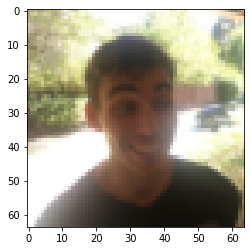

In [15]:
train_x, train_y, test_x, test_y = normalize()

In [5]:
def model(input_shape):
    
    x_input = Input(input_shape)
    
    X = ZeroPadding2D((3,3))(x_input)
    
    X = Conv2D(32, (5,5), (1,1), name='conv0')(X)
    X = BatchNormalization(axis=-1, name='bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), name = 'max_pool_0')(X)
    
    X = Conv2D(64, (3,3), (1,1), name= 'conv1')(X)
    X = BatchNormalization(axis=-1, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), name = 'max_pool_1')(X)
    
    X = Conv2D(128, (1,1), (1,1), name = 'conv2')(X)
    X = BatchNormalization(axis = -1, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name = 'fc')(X)
    
    model = Model(inputs=x_input, outputs=X, name='HappyModel')
    
    return model

In [6]:
happyModel = model(train_x.shape[1:])
happyModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
happyModel.fit(train_x, train_y, epochs=20, batch_size=16)

Train on 600 samples
Epoch 1/20
600/600 [==============================] - 3s 5ms/sample - loss: 0.5406 - accuracy: 0.7817
Epoch 2/20
600/600 [==============================] - 0s 418us/sample - loss: 0.1600 - accuracy: 0.9517

In [8]:
preds = happyModel.evaluate(test_x, test_y)
print('Loss: ' + str(preds[0]))
print('Accuracy: ' + str(preds[1]))

150/150 [==============================] - 0s 3ms/sample - loss: 0.0676 - accuracy: 0.9667
Loss: 0.06756911337375641
Accuracy: 0.96666664


My Image shape:  (1, 64, 64, 3)
0


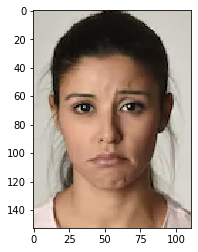

In [13]:
img_path = 'images/sad_face.png'
img = load_img(img_path, target_size=(64,64))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255
print('My Image shape: ', x.shape)
image = plt.imread(img_path)
plt.imshow(image)
predictions = happyModel.predict(x)
print(np.argmax(predictions))

In [11]:
happyModel.save('happy_model.h5')